In [1]:
# Simple Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv') ## Read the csv file and assign it to pandas dataframe
print(dataset) ## Print the dataset

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [5]:
X = dataset.drop(['Salary'], axis=1) ## independent variable,axis=1 means column
y = dataset.Salary ## dependant variable

print(X.head())
print("\n")
print(y.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2


0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10000)

print(X_train)
print("\n")
print(y_train)

    YearsExperience
22              7.9
19              6.0
24              8.7
29             10.5
3               2.0
11              4.0
14              4.5
25              9.0
7               3.2
20              6.8
23              8.2
6               3.0
17              5.3
9               3.7
27              9.6
28             10.3
2               1.5
15              4.9
8               3.2
21              7.1
12              4.0


22    101302.0
19     93940.0
24    109431.0
29    121872.0
3      43525.0
11     55794.0
14     61111.0
25    105582.0
7      54445.0
20     91738.0
23    113812.0
6      60150.0
17     83088.0
9      57189.0
27    112635.0
28    122391.0
2      37731.0
15     67938.0
8      64445.0
21     98273.0
12     56957.0
Name: Salary, dtype: float64


In [9]:
print(X_test)
print("\n")
print(y_test)

    YearsExperience
0               1.1
18              5.9
5               2.9
26              9.5
1               1.3
13              4.1
4               2.2
10              3.9
16              5.1


0      39343.0
18     81363.0
5      56642.0
26    116969.0
1      46205.0
13     57081.0
4      39891.0
10     63218.0
16     66029.0
Name: Salary, dtype: float64


In [10]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) ## Fitting my training data to the algorithm for it to understand the pattern

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print("Coefficient=",regressor.coef_)

# Intercept ## Mean value of Y when X=0 [constant=when all independent variables are zero]
print("Intercept:",regressor.intercept_)

Coefficient= [9543.1721614]
Intercept: 25510.55025160878


In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)
print("\n")
print(y_test)

[ 36008.03962914  81815.26600384  53185.74951966 116170.68578487
  37916.67406142  64637.55611333  46505.52900668  62728.92168105
  74180.72827473]


0      39343.0
18     81363.0
5      56642.0
26    116969.0
1      46205.0
13     57081.0
4      39891.0
10     63218.0
16     66029.0
Name: Salary, dtype: float64


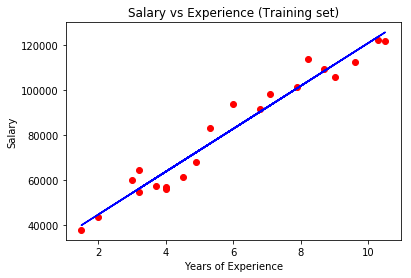

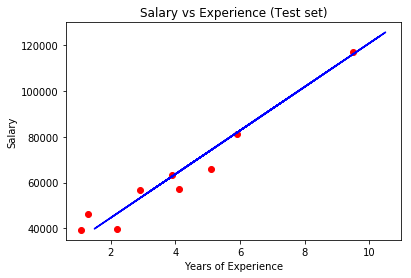

In [21]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
from sklearn import metrics

In [17]:
## The lower these metrics, the better the model is
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4349.112080270824
MSE: 28905470.087512605
RMSE: 5376.380761024335


In [18]:
## Higher the Explained Variance Score, the better the model is:
## How well our model can explain variations in the dataset
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
## 94.5% of the variance is explained by the model

Explained Variance Score: 0.9457385476323863


In [19]:
from sklearn.metrics import r2_score 
## How well the model can explain future data
# r2= It tells how much the regression line is close to the actual line : accuracy of my model : Higher the better
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

r2: 0.944769876614478


In [20]:
y_pred = regressor.predict(11)
y_pred

array([130485.44402696])

In [ ]:
#Conclusion : 
#1. I am 94.5% confident that my model has learnt variations in the data
#2. I am 94.4% confident that the salary of the person will be (130485-5376) to (130485+5376) ie, (125109 - 135861)


#3. 94.4% = r2, 94.5%= variance, 5376=RMSE

In [ ]:
y_pred = regressor.predict(11.5)
y_pred

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
regressor_kfold = LinearRegression()
regression_avg = cross_val_score(estimator = regressor_kfold, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross Val Mean Absolute Error",regression_avg.mean())